In [65]:
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt

In [66]:
np.set_printoptions(precision=4, suppress=True, linewidth=200, floatmode='maxprec')

In [67]:
w0 = np.arange(start=0., stop=np.pi, step=0.001)

#### Функции

In [68]:
# Диаграмма нулей и полюсов
def ZerosPolesDiagram(z, p):
    fg, ax = plt.subplots(figsize=(5, 5))
    circle = plt.Circle(xy=(0,0),radius=1, edgecolor='gray', facecolor='white', linestyle='--')
    ax.add_patch(circle)
    ax.scatter(z.real, z.imag, marker='o', facecolor='white', edgecolor='C0', s=100)
    ax.scatter(p.real, p.imag, marker='x', s=100)
    ax.axhline(y=0, color="black", linestyle="-")
    ax.axvline(x=0, color="black", linestyle="-")
    ax.grid()
    plt.show()

# Расчет АЧХ
def FrequencyResponse(h):
    with np.errstate(divide='ignore'): # suppress RuntimeWarning: divide by zero encountered in log10
        return 20 * np.log10(abs(h))

# Расчет ФЧХ
def PhaseResponse(h):
    return np.unwrap(np.angle(h))

# Графики АЧХ и ФЧХ
def FRPRDiagram(w, fr, pr, logx = False, **kwargs):
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,5), layout='constrained')

    if (logx):
        ax[0].semilogx(w, fr, 'b')
    else:
        ax[0].plot(w, fr, 'b')
    ax[0].set_ylabel('Амплитуда, дБ', color='b')
    ax[0].set_xlabel('Частота, рад/с')
    ax[0].grid(True)

    if (logx):
        ax[1].semilogx(w, pr, 'g')
    else:
        ax[1].plot(w, pr, 'g')
    ax[1].set_ylabel('Фаза, рад', color='g')
    ax[1].set_xlabel('Частота, рад/с')
    ax[1].grid(True)

    if 'title' in kwargs.keys():
        fig.suptitle(kwargs['title'])

    if 'ylimits' in kwargs.keys():
        ax[0].set_ylim(kwargs['ylimits'])

    if 'xvlines' in kwargs.keys():
        for xvline in kwargs['xvlines']:
            for axis in ax:
                axis.axvline(x=xvline, color='gray', linestyle='dashed', linewidth=1.5)
    
    plt.show()

# Оболочка для отрисовки графика при вызове функций freqs и freqz в линейном масштабе
def FRPRDiag (w, h):
    FRPRDiagram(w, FrequencyResponse(h), PhaseResponse(h), logx=False)

# Оболочка для отрисовки графика при вызове функций freqs и freqz в логарифмическом масштабе
def FRPRDiagLog (w, h):
    FRPRDiagram(w, FrequencyResponse(h), PhaseResponse(h), logx=True)


### Аппроксимация Баттерворта

#### Синтез прототипа аналогового фильтра нижних частот Баттерворта 

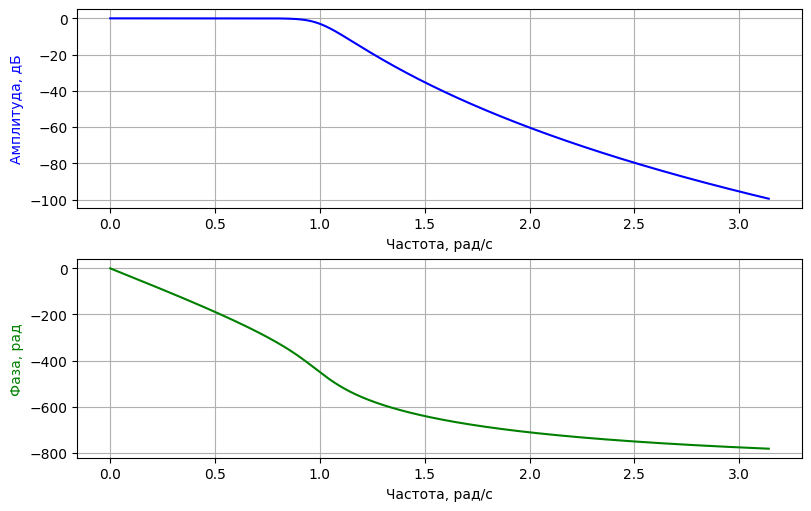

In [69]:
z, p, k = sp.buttap(N=10)

w, mag, phase = sp.bode(system=(z,p,k),w=w0)
FRPRDiagram(w=w, fr=mag, pr=phase, logx=False)

In [70]:
b, a = sp.zpk2tf(z=z, p=p, k=k)
print('Коэффициенты прямых связей:', b)
print('Коэффициенты обратных связей:', a)
# print('b =', *[format(x, ".4f") for x in b])
# print('a =', *[format(x, ".4f") for x in a])

Коэффициенты прямых связей: [1.]
Коэффициенты обратных связей: [ 1.      6.3925 20.4317 42.8021 64.8824 74.2334 64.8824 42.8021 20.4317  6.3925  1.    ]


In [71]:
sos = sp.zpk2sos(z=z, p=p, k=k, analog=True)
print('Секции второго порядка:', sos)
# print('sos =', *[format(x, ".4f") for x in sos])

Секции второго порядка: [[0.     0.     1.     1.     1.9754 1.    ]
 [0.     0.     1.     1.     1.782  1.    ]
 [0.     0.     1.     1.     1.4142 1.    ]
 [0.     0.     1.     1.     0.908  1.    ]
 [0.     0.     1.     1.     0.3129 1.    ]]


#### Синтез фильтра нижних частот Баттерворта по характеристикам прототипа

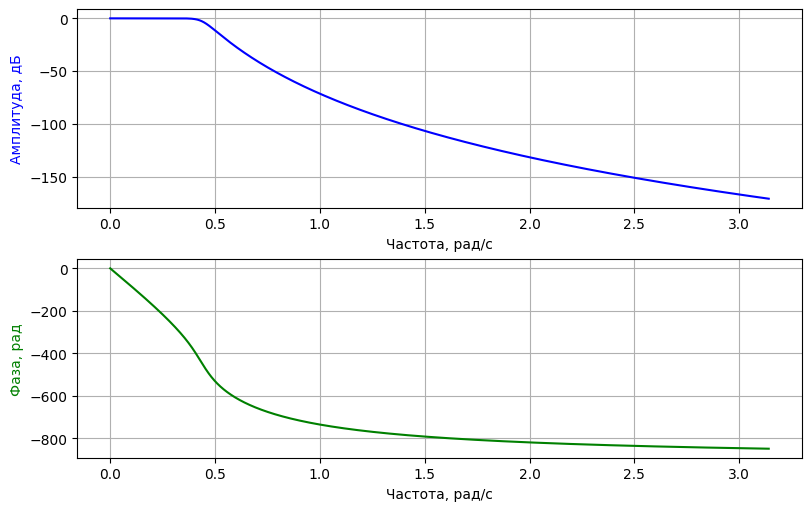

In [72]:
z1, p1, k1 = sp.lp2lp_zpk(z=z, p=p, k=k, wo=0.44)
w, mag, phase = sp.bode(system=(z1,p1,k1),w=w0)
FRPRDiagram(w=w, fr=mag, pr=phase, logx=False)

In [73]:
b, a = sp.zpk2tf(z=z1, p=p1, k=k1)
print('Коэффициенты прямых связей:', b)
print('Коэффициенты обратных связей:', a)
# print('b =', *[format(x, ".4f") for x in b])
# print('a =', *[format(x, ".4f") for x in a])

Коэффициенты прямых связей: [0.0003]
Коэффициенты обратных связей: [1.     2.8127 3.9556 3.6461 2.4319 1.2242 0.4708 0.1367 0.0287 0.004  0.0003]


In [74]:
sos = sp.zpk2sos(z=z1, p=p1, k=k1, analog=True)
print('Секции второго порядка:', sos)
# print('sos =', *[format(x, ".4f") for x in sos])

Секции второго порядка: [[0.     0.     0.0003 1.     0.8692 0.1936]
 [0.     0.     1.     1.     0.7841 0.1936]
 [0.     0.     1.     1.     0.6223 0.1936]
 [0.     0.     1.     1.     0.3995 0.1936]
 [0.     0.     1.     1.     0.1377 0.1936]]


#### Синтез фильтра верхних частот Баттерворта по характеристикам прототипа

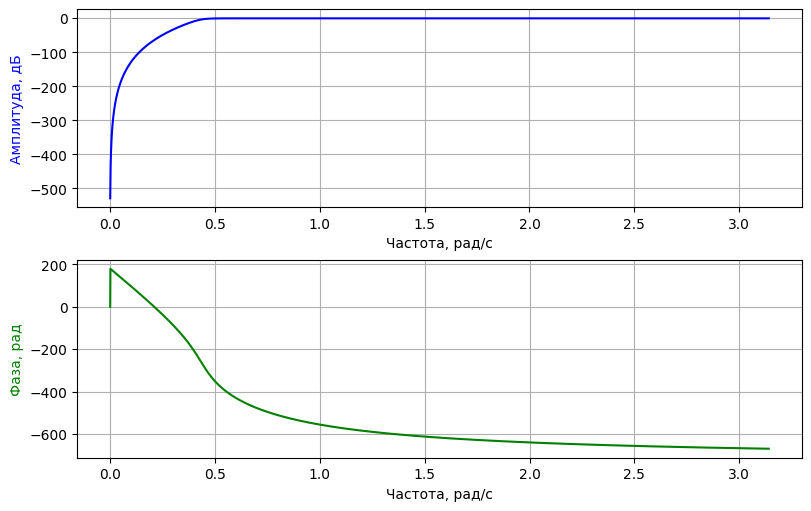

In [75]:
z2, p2, k2 = sp.lp2hp_zpk(z=z, p=p, k=k, wo=0.44)
w, mag, phase = sp.bode(system=(z2,p2,k2),w=w0)
FRPRDiagram(w=w, fr=mag, pr=phase, logx=False)

In [76]:
b, a = sp.zpk2tf(z=z2, p=p2, k=k2)
print('Коэффициенты прямых связей:', b)
print('Коэффициенты обратных связей:', a)
# print('b =', *[format(x, ".4f") for x in b])
# print('a =', *[format(x, ".4f") for x in a])

Коэффициенты прямых связей: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Коэффициенты обратных связей: [1.     2.8127 3.9556 3.6461 2.4319 1.2242 0.4708 0.1367 0.0287 0.004  0.0003]


In [77]:
sos = sp.zpk2sos(z=z2, p=p2, k=k2, analog=True)
print('Секции второго порядка:', sos)
# print('sos =', *[format(x, ".4f") for x in sos])

Секции второго порядка: [[1.     0.     0.     1.     0.8692 0.1936]
 [1.     0.     0.     1.     0.7841 0.1936]
 [1.     0.     0.     1.     0.6223 0.1936]
 [1.     0.     0.     1.     0.3995 0.1936]
 [1.     0.     0.     1.     0.1377 0.1936]]


#### Синтез полосового фильтра Баттерворта по характеристикам прототипа

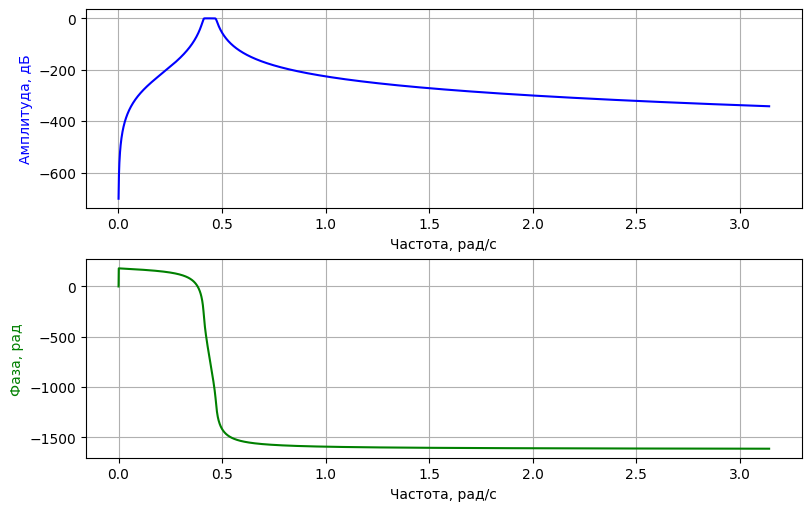

In [78]:
z3, p3, k3 = sp.lp2bp_zpk(z=z, p=p, k=k, wo=0.44, bw=0.06)
# w, mag, phase = sp.bode(system=(z3,p3,k3),n=100)
w, mag, phase = sp.bode(system=(z3,p3,k3),w=w0)
FRPRDiagram(w=w, fr=mag, pr=phase, logx=False)

In [79]:
b, a = sp.zpk2tf(z=z3, p=p3, k=k3)
print('Коэффициенты прямых связей:', b)
print('Коэффициенты обратных связей:', a)
# print('b =', *[format(x, ".4f") for x in b])
# print('a =', *[format(x, ".4f") for x in a])

Коэффициенты прямых связей: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Коэффициенты обратных связей: [1.     0.3835 2.0096 0.6775 1.8014 0.5301 0.9489 0.2411 0.3254 0.0703 0.0759 0.0136 0.0122 0.0017 0.0013 0.0001 0.0001 0.     0.     0.     0.    ]


In [80]:
sos = sp.zpk2sos(z=z3, p=p3, k=k3, analog=True)
print('Секции второго порядка:', sos)
# print('sos =', *[format(x, ".4f") for x in sos])

Секции второго порядка: [[0.     0.     0.     1.     0.0599 0.1978]
 [0.     0.     1.     1.     0.0586 0.1895]
 [0.     0.     1.     1.     0.0551 0.206 ]
 [0.     0.     1.     1.     0.0518 0.182 ]
 [0.     0.     1.     1.     0.0445 0.2132]
 [1.     0.     0.     1.     0.0404 0.1758]
 [1.     0.     0.     1.     0.0289 0.2186]
 [1.     0.     0.     1.     0.0256 0.1715]
 [1.     0.     0.     1.     0.01   0.2215]
 [1.     0.     0.     1.     0.0088 0.1692]]


#### Синтез режекторного фильтра Баттерворта по характеристикам прототипа

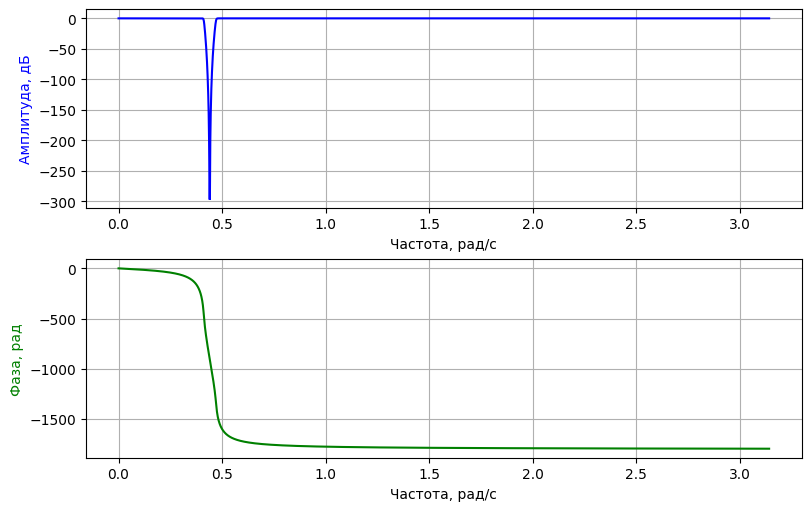

In [81]:
z4, p4, k4 = sp.lp2bs_zpk(z=z, p=p, k=k, wo=0.44, bw=0.06)
w, mag, phase = sp.bode(system=(z4,p4,k4),w=w0)
# w, mag, phase = sp.bode(system=(z4,p4,k4),n=100)
FRPRDiagram(w=w, fr=mag, pr=phase, logx=False)

In [82]:
b, a = sp.zpk2tf(z=z4, p=p4, k=k4)
print('Коэффициенты прямых связей:', b)
print('Коэффициенты обратных связей:', a)
# print('b =', *[format(x, ".4f") for x in b])
# print('a =', *[format(x, ".4f") for x in a])

Коэффициенты прямых связей: [1.     0.     1.936  0.     1.6866 0.     0.8708 0.     0.295  0.     0.0685 0.     0.0111 0.     0.0012 0.     0.0001 0.     0.     0.     0.    ]
Коэффициенты обратных связей: [1.     0.3835 2.0096 0.6775 1.8014 0.5301 0.9489 0.2411 0.3254 0.0703 0.0759 0.0136 0.0122 0.0017 0.0013 0.0001 0.0001 0.     0.     0.     0.    ]


In [83]:
sos = sp.zpk2sos(z=z4, p=p4, k=k4, analog=True)
print('Секции второго порядка:', sos)
# print('sos =', *[format(x, ".4f") for x in sos])

Секции второго порядка: [[1.     0.     0.1936 1.     0.0599 0.1978]
 [1.     0.     0.1936 1.     0.0586 0.1895]
 [1.     0.     0.1936 1.     0.0551 0.206 ]
 [1.     0.     0.1936 1.     0.0518 0.182 ]
 [1.     0.     0.1936 1.     0.0445 0.2132]
 [1.     0.     0.1936 1.     0.0404 0.1758]
 [1.     0.     0.1936 1.     0.0289 0.2186]
 [1.     0.     0.1936 1.     0.0256 0.1715]
 [1.     0.     0.1936 1.     0.01   0.2215]
 [1.     0.     0.1936 1.     0.0088 0.1692]]


### Аппроксимация Чебышева 1

#### Синтез прототипа аналогового фильтра нижних частот Чебышева 1 

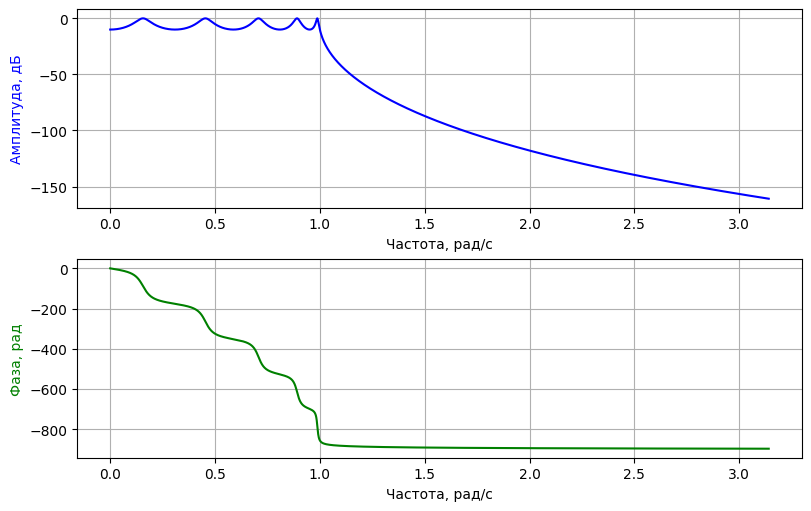

In [84]:
z, p, k = sp.cheb1ap(N=10, rp=10)

w, mag, phase = sp.bode(system=(z,p,k),w=w0)
FRPRDiagram(w=w, fr=mag, pr=phase, logx=False)

In [85]:
b, a = sp.zpk2tf(z=z, p=p, k=k)
print('Коэффициенты прямых связей:', b)
print('Коэффициенты обратных связей:', a)
# print('b =', *[format(x, ".4f") for x in b])
# print('a =', *[format(x, ".4f") for x in a])

Коэффициенты прямых связей: [0.0007]
Коэффициенты обратных связей: [1.     0.2094 2.5219 0.4545 2.2276 0.3269 0.8038 0.0863 0.1016 0.0061 0.0021]


In [86]:
sos = sp.zpk2sos(z=z, p=p, k=k, analog=True)
print('Секции второго порядка:', sos)
# print('sos =', *[format(x, ".4f") for x in sos])

Секции второго порядка: [[0.     0.     0.0007 1.     0.0647 0.0255]
 [0.     0.     1.     1.     0.0584 0.2072]
 [0.     0.     1.     1.     0.0463 0.5011]
 [0.     0.     1.     1.     0.0297 0.795 ]
 [0.     0.     1.     1.     0.0102 0.9766]]


#### Синтез фильтра нижних частот Чебышева 1 по характеристикам прототипа

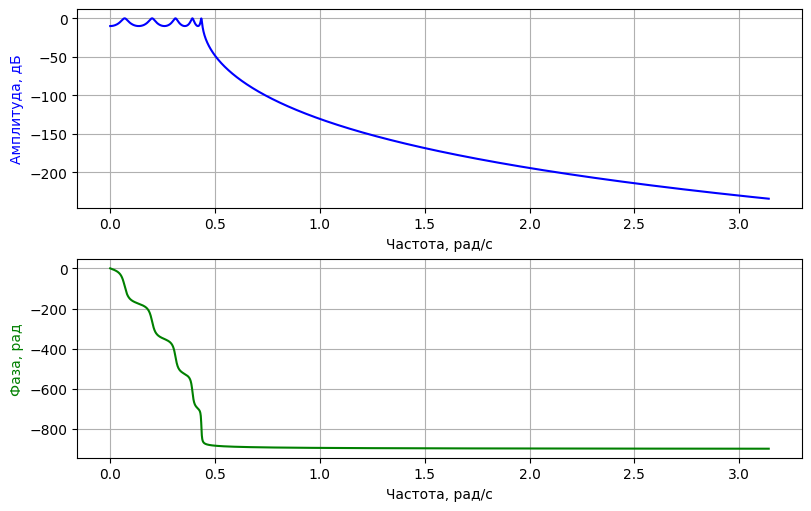

In [87]:
z1, p1, k1 = sp.lp2lp_zpk(z=z, p=p, k=k, wo=0.44)
# w, mag, phase = sp.bode(system=(z1,p1,k1),n=100)
w, mag, phase = sp.bode(system=(z1,p1,k1),w=w0)
FRPRDiagram(w=w, fr=mag, pr=phase, logx=False)

In [88]:
b, a = sp.zpk2tf(z=z1, p=p1, k=k1)
print('Коэффициенты прямых связей:', b)
print('Коэффициенты обратных связей:', a)
# print('b =', *[format(x, ".4f") for x in b])
# print('a =', *[format(x, ".4f") for x in a])

Коэффициенты прямых связей: [0.]
Коэффициенты обратных связей: [1.     0.0921 0.4882 0.0387 0.0835 0.0054 0.0058 0.0003 0.0001 0.     0.    ]


In [89]:
sos = sp.zpk2sos(z=z1, p=p1, k=k1, analog=True)
print('Секции второго порядка:', sos)
# print('sos =', *[format(x, ".4f") for x in sos])

Секции второго порядка: [[0.     0.     0.     1.     0.0285 0.0049]
 [0.     0.     1.     1.     0.0257 0.0401]
 [0.     0.     1.     1.     0.0204 0.097 ]
 [0.     0.     1.     1.     0.0131 0.1539]
 [0.     0.     1.     1.     0.0045 0.1891]]


#### Синтез фильтра верхних частот Чебышева 1 по характеристикам прототипа

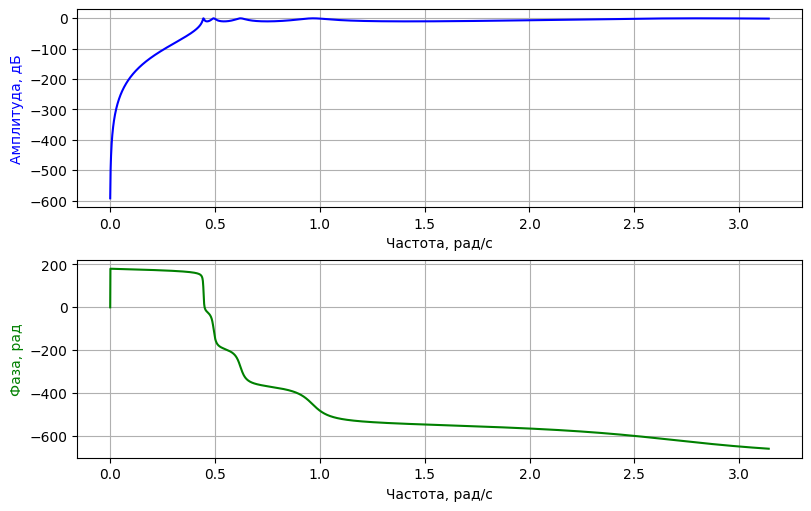

In [90]:
z2, p2, k2 = sp.lp2hp_zpk(z=z, p=p, k=k, wo=0.44)
# w, mag, phase = sp.bode(system=(z2,p2,k2),n=100)
w, mag, phase = sp.bode(system=(z2,p2,k2),w=w0)
FRPRDiagram(w=w, fr=mag, pr=phase, logx=False)

In [91]:
b, a = sp.zpk2tf(z=z2, p=p2, k=k2)
print('Коэффициенты прямых связей:', b)
print('Коэффициенты обратных связей:', a)
# print('b =', *[format(x, ".4f") for x in b])
# print('a =', *[format(x, ".4f") for x in a])

Коэффициенты прямых связей: [0.3162 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
Коэффициенты обратных связей: [ 1.      1.3001  9.5571  3.5721 14.6342  2.6184  7.8515  0.7049  1.7209  0.0629  0.1321]


In [92]:
sos = sp.zpk2sos(z=z2, p=p2, k=k2, analog=True)
print('Секции второго порядка:', sos)
# print('sos =', *[format(x, ".4f") for x in sos])

Секции второго порядка: [[0.3162 0.     0.     1.     1.1144 7.579 ]
 [1.     0.     0.     1.     0.1239 0.9345]
 [1.     0.     0.     1.     0.0407 0.3864]
 [1.     0.     0.     1.     0.0165 0.2435]
 [1.     0.     0.     1.     0.0046 0.1982]]


#### Синтез полосового фильтра Чебышева 1 по характеристикам прототипа

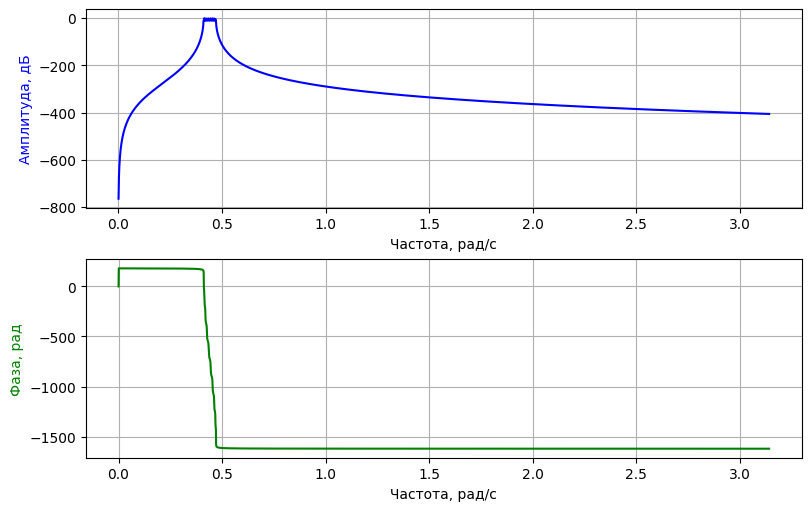

In [93]:
z3, p3, k3 = sp.lp2bp_zpk(z=z, p=p, k=k, wo=0.44, bw=0.06)
# w, mag, phase = sp.bode(system=(z3,p3,k3),n=100)
w, mag, phase = sp.bode(system=(z3,p3,k3),w=w0)
FRPRDiagram(w=w, fr=mag, pr=phase, logx=False)

In [94]:
b, a = sp.zpk2tf(z=z3, p=p3, k=k3)
print('Коэффициенты прямых связей:', b)
print('Коэффициенты обратных связей:', a)
# print('b =', *[format(x, ".4f") for x in b])
# print('a =', *[format(x, ".4f") for x in a])

Коэффициенты прямых связей: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Коэффициенты обратных связей: [1.     0.0126 1.9451 0.022  1.7007 0.0171 0.8803 0.0077 0.2987 0.0022 0.0694 0.0004 0.0112 0.0001 0.0012 0.     0.0001 0.     0.     0.     0.    ]


In [95]:
sos = sp.zpk2sos(z=z3, p=p3, k=k3, analog=True)
print('Секции второго порядка:', sos)
# print('sos =', *[format(x, ".4f") for x in sos])

Секции второго порядка: [[0.     0.     0.     1.     0.002  0.1978]
 [0.     0.     1.     1.     0.0019 0.1895]
 [0.     0.     1.     1.     0.0018 0.206 ]
 [0.     0.     1.     1.     0.0017 0.182 ]
 [0.     0.     1.     1.     0.0015 0.2132]
 [1.     0.     0.     1.     0.0013 0.1758]
 [1.     0.     0.     1.     0.0009 0.2186]
 [1.     0.     0.     1.     0.0008 0.1715]
 [1.     0.     0.     1.     0.0003 0.2215]
 [1.     0.     0.     1.     0.0003 0.1692]]


#### Синтез режекторного фильтра Чебышева 1 по характеристикам прототипа

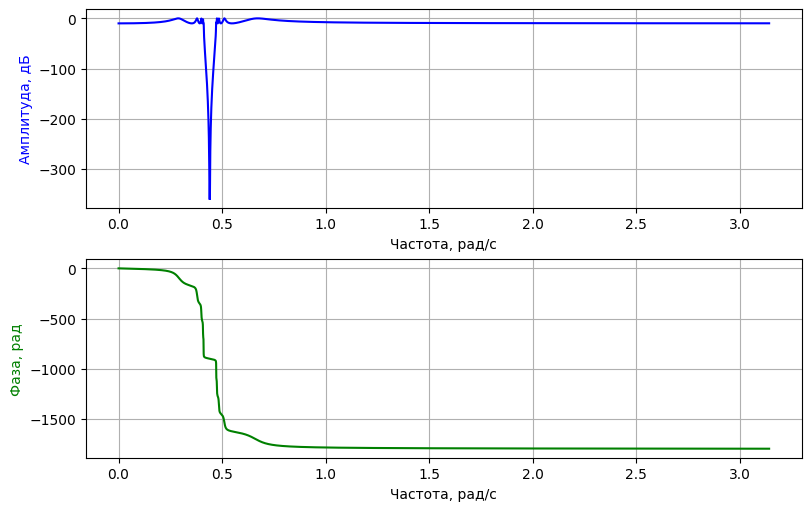

In [96]:
z4, p4, k4 = sp.lp2bs_zpk(z=z, p=p, k=k, wo=0.44, bw=0.06)
w, mag, phase = sp.bode(system=(z4,p4,k4),w=w0)
# w, mag, phase = sp.bode(system=(z4,p4,k4),n=100)
FRPRDiagram(w=w, fr=mag, pr=phase, logx=False)

In [97]:
b, a = sp.zpk2tf(z=z4, p=p4, k=k4)
print('Коэффициенты прямых связей:', b)
print('Коэффициенты обратных связей:', a)
# print('b =', *[format(x, ".4f") for x in b])
# print('a =', *[format(x, ".4f") for x in a])

Коэффициенты прямых связей: [0.3162 0.     0.6122 0.     0.5334 0.     0.2754 0.     0.0933 0.     0.0217 0.     0.0035 0.     0.0004 0.     0.     0.     0.     0.     0.    ]
Коэффициенты обратных связей: [1.     0.1773 2.1137 0.318  1.9669 0.2516 1.0632 0.1153 0.3701 0.0337 0.0868 0.0065 0.0139 0.0008 0.0015 0.0001 0.0001 0.     0.     0.     0.    ]


In [98]:
sos = sp.zpk2sos(z=z4, p=p4, k=k4, analog=True)
print('Секции второго порядка:', sos)
# print('sos =', *[format(x, ".4f") for x in sos])

Секции второго порядка: [[0.3162 0.     0.0612 1.     0.1053 0.4376]
 [1.     0.     0.1936 1.     0.0466 0.0857]
 [1.     0.     0.1936 1.     0.0097 0.2608]
 [1.     0.     0.1936 1.     0.0072 0.1437]
 [1.     0.     0.1936 1.     0.003  0.2346]
 [1.     0.     0.1936 1.     0.0025 0.1597]
 [1.     0.     0.1936 1.     0.0012 0.2256]
 [1.     0.     0.1936 1.     0.001  0.1662]
 [1.     0.     0.1936 1.     0.0003 0.2222]
 [1.     0.     0.1936 1.     0.0003 0.1687]]


### Аппроксимация Чебышева 2

#### Синтез прототипа аналогового фильтра нижних частот Чебышева 2

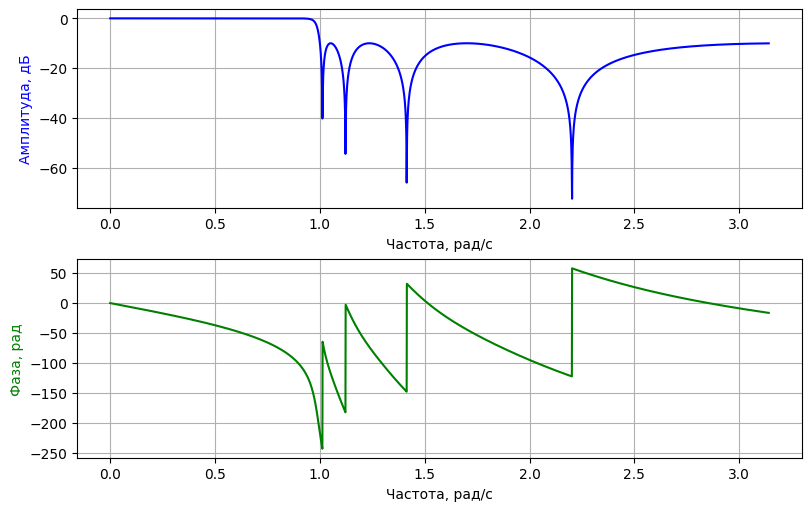

In [99]:
z, p, k = sp.cheb2ap(N=10, rs=10)

w, mag, phase = sp.bode(system=(z,p,k),w=w0)
FRPRDiagram(w=w, fr=mag, pr=phase, logx=False)

In [100]:
b, a = sp.zpk2tf(z=z, p=p, k=k)
print('Коэффициенты прямых связей:', b)
print('Коэффициенты обратных связей:', a)
# print('b =', *[format(x, ".4f") for x in b])
# print('a =', *[format(x, ".4f") for x in a])

Коэффициенты прямых связей: [  0.3162   0.      15.8114   0.     126.4911   0.     354.1751   0.     404.7715   0.     161.9086]
Коэффициенты обратных связей: [  1.       8.3401  39.7784 105.5565 254.1882 359.2507 568.0638 451.8683 515.3722 189.247  161.9086]


In [101]:
sos = sp.zpk2sos(z=z, p=p, k=k, analog=True)
print('Секции второго порядка:', sos)
# print('sos =', *[format(x, ".4f") for x in sos])

Секции второго порядка: [[ 0.3162  0.     12.9222  1.      6.2377 17.2696]
 [ 1.      0.      4.8518  1.      1.3603  4.1747]
 [ 1.      0.      2.      1.      0.4848  1.8746]
 [ 1.      0.      1.2596  1.      0.2007  1.2087]
 [ 1.      0.      1.0251  1.      0.0567  0.9911]]


#### Синтез фильтра нижних частот Чебышева 2 по характеристикам прототипа

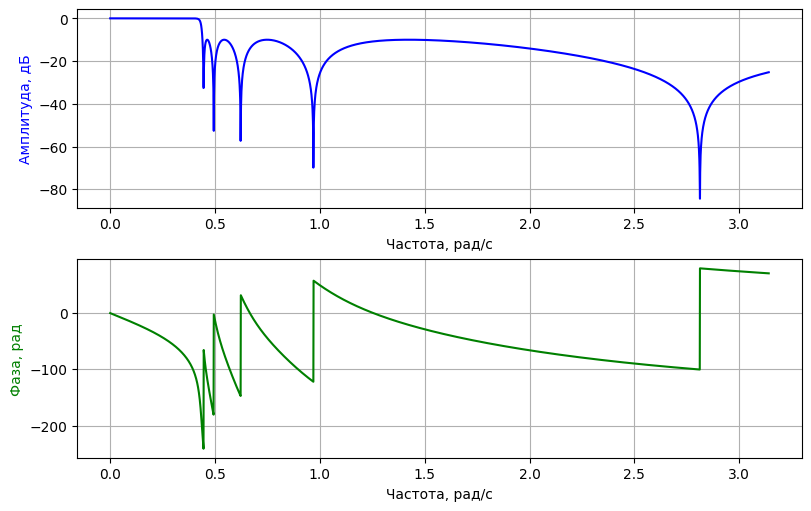

In [102]:
z1, p1, k1 = sp.lp2lp_zpk(z=z, p=p, k=k, wo=0.44)
# w, mag, phase = sp.bode(system=(z1,p1,k1),n=100)
w, mag, phase = sp.bode(system=(z1,p1,k1),w=w0)
FRPRDiagram(w=w, fr=mag, pr=phase, logx=False)

In [103]:
b, a = sp.zpk2tf(z=z1, p=p1, k=k1)
print('Коэффициенты прямых связей:', b)
print('Коэффициенты обратных связей:', a)
# print('b =', *[format(x, ".4f") for x in b])
# print('a =', *[format(x, ".4f") for x in a])

Коэффициенты прямых связей: [0.3162 0.     3.0611 0.     4.741  0.     2.57   0.     0.5686 0.     0.044 ]
Коэффициенты обратных связей: [1.     3.6696 7.7011 8.9917 9.5272 5.9246 4.122  1.4427 0.724  0.117  0.044 ]


In [104]:
sos = sp.zpk2sos(z=z1, p=p1, k=k1, analog=True)
print('Секции второго порядка:', sos)
# print('sos =', *[format(x, ".4f") for x in sos])

Секции второго порядка: [[0.3162 0.     2.5017 1.     2.7446 3.3434]
 [1.     0.     0.9393 1.     0.5985 0.8082]
 [1.     0.     0.3872 1.     0.2133 0.3629]
 [1.     0.     0.2439 1.     0.0883 0.234 ]
 [1.     0.     0.1985 1.     0.0249 0.1919]]


#### Синтез фильтра верхних частот Чебышева 2 по характеристикам прототипа

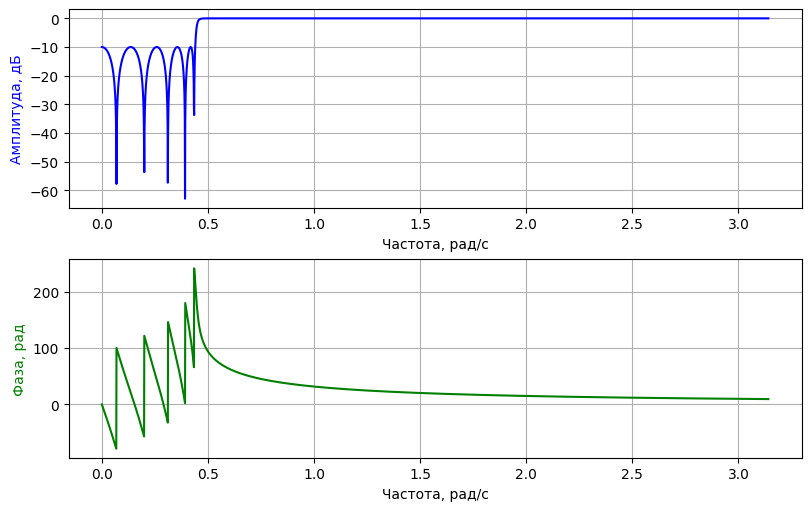

In [105]:
z2, p2, k2 = sp.lp2hp_zpk(z=z, p=p, k=k, wo=0.44)
# w, mag, phase = sp.bode(system=(z2,p2,k2),n=100)
w, mag, phase = sp.bode(system=(z2,p2,k2),w=w0)
FRPRDiagram(w=w, fr=mag, pr=phase, logx=False)

In [106]:
b, a = sp.zpk2tf(z=z2, p=p2, k=k2)
print('Коэффициенты прямых связей:', b)
print('Коэффициенты обратных связей:', a)
# print('b =', *[format(x, ".4f") for x in b])
# print('a =', *[format(x, ".4f") for x in a])

Коэффициенты прямых связей: [1.     0.     0.484  0.     0.082  0.     0.0057 0.     0.0001 0.     0.    ]
Коэффициенты обратных связей: [1.     0.5143 0.6162 0.2377 0.1315 0.0366 0.0114 0.0021 0.0003 0.     0.    ]


In [107]:
sos = sp.zpk2sos(z=z2, p=p2, k=k2, analog=True)
print('Секции второго порядка:', sos)
# print('sos =', *[format(x, ".4f") for x in sos])

Секции второго порядка: [[1.     0.     0.0047 1.     0.1589 0.0112]
 [1.     0.     0.0399 1.     0.1434 0.0464]
 [1.     0.     0.0968 1.     0.1138 0.1033]
 [1.     0.     0.1537 1.     0.0731 0.1602]
 [1.     0.     0.1889 1.     0.0252 0.1953]]


#### Синтез полосового фильтра Чебышева 2 по характеристикам прототипа

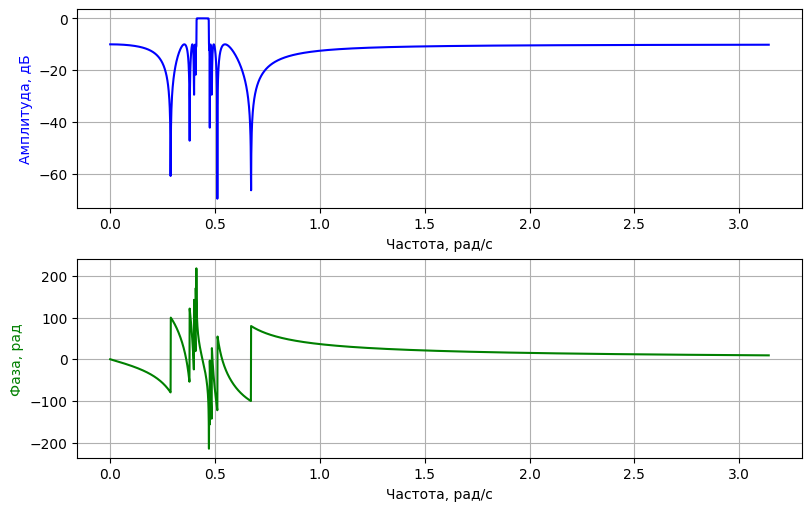

In [108]:
z3, p3, k3 = sp.lp2bp_zpk(z=z, p=p, k=k, wo=0.44, bw=0.06)
# w, mag, phase = sp.bode(system=(z3,p3,k3),n=100)
w, mag, phase = sp.bode(system=(z3,p3,k3),w=w0)
FRPRDiagram(w=w, fr=mag, pr=phase, logx=False)

In [109]:
b, a = sp.zpk2tf(z=z3, p=p3, k=k3)
print('Коэффициенты прямых связей:', b)
print('Коэффициенты обратных связей:', a)
# print('b =', *[format(x, ".4f") for x in b])
# print('a =', *[format(x, ".4f") for x in a])

Коэффициенты прямых связей: [0.3162 0.     0.6691 0.     0.6232 0.     0.337  0.     0.1174 0.     0.0275 0.     0.0044 0.     0.0005 0.     0.     0.     0.     0.     0.    ]
Коэффициенты обратных связей: [1.     0.5004 2.0792 0.8947 1.9117 0.7064 1.0249 0.3232 0.3551 0.0945 0.0831 0.0183 0.0133 0.0023 0.0014 0.0002 0.0001 0.     0.     0.     0.    ]


In [110]:
sos = sp.zpk2sos(z=z3, p=p3, k=k3, analog=True)
print('Секции второго порядка:', sos)
# print('sos =', *[format(x, ".4f") for x in sos])

Секции второго порядка: [[0.3162 0.     0.1427 1.     0.2223 0.2833]
 [1.     0.     0.0831 1.     0.1519 0.1323]
 [1.     0.     0.2611 1.     0.0461 0.2517]
 [1.     0.     0.1435 1.     0.0355 0.1489]
 [1.     0.     0.2347 1.     0.0159 0.2326]
 [1.     0.     0.1597 1.     0.0132 0.1611]
 [1.     0.     0.2256 1.     0.0065 0.2247]
 [1.     0.     0.1662 1.     0.0056 0.1668]
 [1.     0.     0.2222 1.     0.0018 0.2217]
 [1.     0.     0.1687 1.     0.0016 0.1691]]


#### Синтез режекторного фильтра Чебышева 2 по характеристикам прототипа

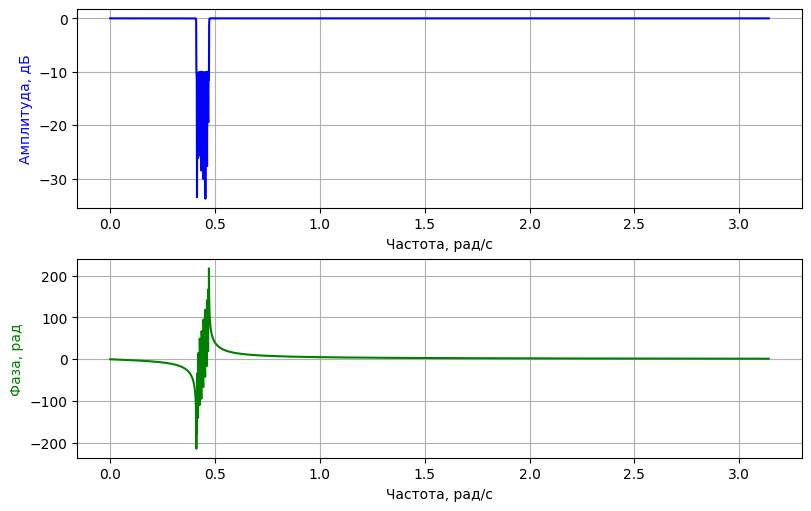

In [111]:
z4, p4, k4 = sp.lp2bs_zpk(z=z, p=p, k=k, wo=0.44, bw=0.06)
w, mag, phase = sp.bode(system=(z4,p4,k4),w=w0)
# w, mag, phase = sp.bode(system=(z4,p4,k4),n=100)
FRPRDiagram(w=w, fr=mag, pr=phase, logx=False)

In [112]:
b, a = sp.zpk2tf(z=z4, p=p4, k=k4)
print('Коэффициенты прямых связей:', b)
print('Коэффициенты обратных связей:', a)
# print('b =', *[format(x, ".4f") for x in b])
# print('a =', *[format(x, ".4f") for x in a])

Коэффициенты прямых связей: [1.     0.     1.945  0.     1.7006 0.     0.8802 0.     0.2987 0.     0.0694 0.     0.0112 0.     0.0012 0.     0.0001 0.     0.     0.     0.    ]
Коэффициенты обратных связей: [1.     0.0701 1.9475 0.1228 1.7044 0.0954 0.8828 0.0432 0.2997 0.0126 0.0697 0.0024 0.0112 0.0003 0.0012 0.     0.0001 0.     0.     0.     0.    ]


In [113]:
sos = sp.zpk2sos(z=z4, p=p4, k=k4, analog=True)
print('Секции второго порядка:', sos)
# print('sos =', *[format(x, ".4f") for x in sos])

Секции второго порядка: [[1.     0.     0.1978 1.     0.011  0.1978]
 [1.     0.     0.1895 1.     0.0107 0.1894]
 [1.     0.     0.206  1.     0.0101 0.2062]
 [1.     0.     0.182  1.     0.0095 0.1818]
 [1.     0.     0.2132 1.     0.0081 0.2135]
 [1.     0.     0.1758 1.     0.0074 0.1755]
 [1.     0.     0.2186 1.     0.0053 0.219 ]
 [1.     0.     0.1715 1.     0.0047 0.1711]
 [1.     0.     0.2215 1.     0.0018 0.222 ]
 [1.     0.     0.1692 1.     0.0016 0.1688]]


### Эллиптическая аппроксимация

#### Синтез прототипа аналогового эллиптического фильтра нижних частот

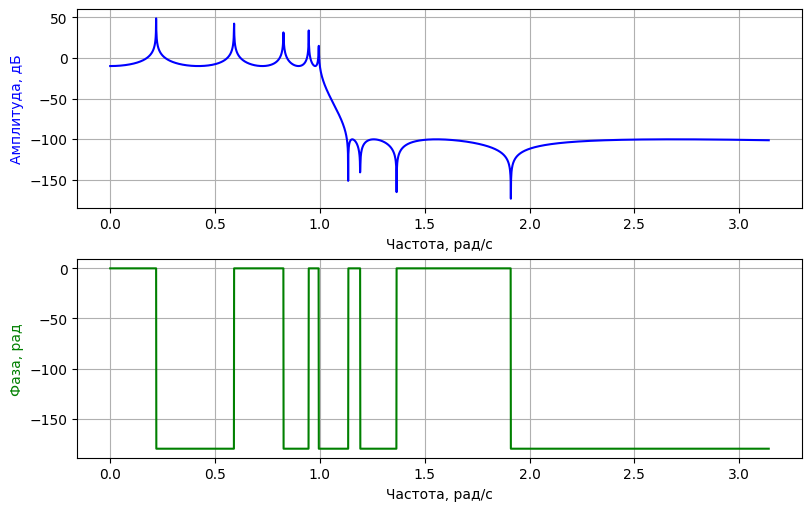

In [114]:
z, p, k = sp.ellipap(N=10, rp=10, rs=10)

w, mag, phase = sp.bode(system=(z,p,k),w=w0)
FRPRDiagram(w=w, fr=mag, pr=phase, logx=False)

In [115]:
b, a = sp.zpk2tf(z=z, p=p, k=k)
print('Коэффициенты прямых связей:', b)
print('Коэффициенты обратных связей:', a)
# print('b =', *[format(x, ".4f") for x in b])
# print('a =', *[format(x, ".4f") for x in a])

Коэффициенты прямых связей: [0.     0.     0.0003 0.     0.0023 0.     0.0063 0.     0.0075 0.     0.0032]
Коэффициенты обратных связей: [1.     0.     2.9658 0.     3.2116 0.     1.5123 0.     0.277  0.     0.0102]


In [116]:
sos = sp.zpk2sos(z=z, p=p, k=k, analog=True)
print('Секции второго порядка:', sos)
# print('sos =', *[format(x, ".4f") for x in sos])

Секции второго порядка: [[0.     0.     0.0003 1.     0.     0.9893]
 [1.     0.     3.6517 1.     0.     0.8965]
 [1.     0.     1.8658 1.     0.     0.683 ]
 [1.     0.     1.4216 1.     0.     0.349 ]
 [1.     0.     1.2883 1.     0.     0.048 ]]


#### Синтез эллиптического фильтра нижних частот по характеристикам прототипа

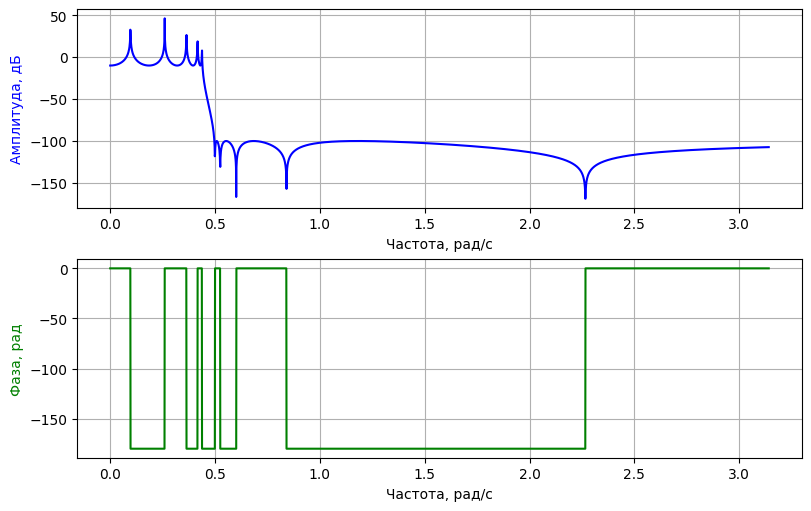

In [117]:
z1, p1, k1 = sp.lp2lp_zpk(z=z, p=p, k=k, wo=0.44)
# w, mag, phase = sp.bode(system=(z1,p1,k1),n=100)
w, mag, phase = sp.bode(system=(z1,p1,k1),w=w0)
FRPRDiagram(w=w, fr=mag, pr=phase, logx=False)

In [118]:
b, a = sp.zpk2tf(z=z1, p=p1, k=k1)
print('Коэффициенты прямых связей:', b)
print('Коэффициенты обратных связей:', a)
# print('b =', *[format(x, ".4f") for x in b])
# print('a =', *[format(x, ".4f") for x in a])

Коэффициенты прямых связей: [0.     0.     0.0001 0.     0.0001 0.     0.     0.     0.     0.     0.    ]
Коэффициенты обратных связей: [1.     0.     0.5742 0.     0.1204 0.     0.011  0.     0.0004 0.     0.    ]


In [119]:
sos = sp.zpk2sos(z=z1, p=p1, k=k1, analog=True)
print('Секции второго порядка:', sos)
# print('sos =', *[format(x, ".4f") for x in sos])

Секции второго порядка: [[0.     0.     0.     1.     0.     0.1915]
 [1.     0.     0.707  1.     0.     0.1736]
 [1.     0.     0.3612 1.     0.     0.1322]
 [1.     0.     0.2752 1.     0.     0.0676]
 [1.     0.     0.2494 1.     0.     0.0093]]


#### Синтез эллиптического фильтра верхних частот по характеристикам прототипа

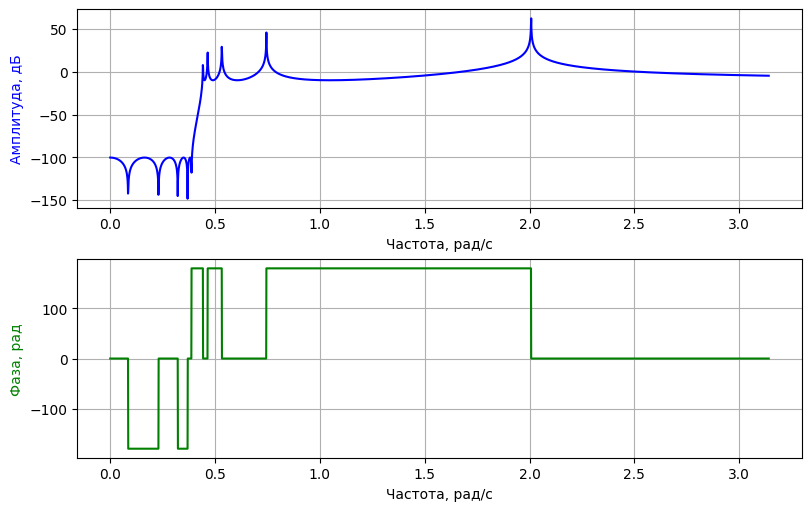

In [120]:
z2, p2, k2 = sp.lp2hp_zpk(z=z, p=p, k=k, wo=0.44)
# w, mag, phase = sp.bode(system=(z2,p2,k2),n=100)
w, mag, phase = sp.bode(system=(z2,p2,k2),w=w0)
FRPRDiagram(w=w, fr=mag, pr=phase, logx=False)

In [121]:
b, a = sp.zpk2tf(z=z2, p=p2, k=k2)
print('Коэффициенты прямых связей:', b)
print('Коэффициенты обратных связей:', a)
# print('b =', *[format(x, ".4f") for x in b])
# print('a =', *[format(x, ".4f") for x in a])

Коэффициенты прямых связей: [0.3162 0.     0.1425 0.     0.0234 0.     0.0017 0.     0.     0.     0.    ]
Коэффициенты обратных связей: [1.     0.     5.2807 0.     5.5824 0.     2.2951 0.     0.4103 0.     0.0268]


In [122]:
sos = sp.zpk2sos(z=z2, p=p2, k=k2, analog=True)
print('Секции второго порядка:', sos)
# print('sos =', *[format(x, ".4f") for x in sos])

Секции второго порядка: [[0.3162 0.     0.0023 1.     0.     4.0309]
 [1.     0.     0.053  1.     0.     0.5547]
 [1.     0.     0.1038 1.     0.     0.2834]
 [1.     0.     0.1362 1.     0.     0.2159]
 [1.     0.     0.1503 1.     0.     0.1957]]


#### Синтез полосового эллиптического фильтра по характеристикам прототипа

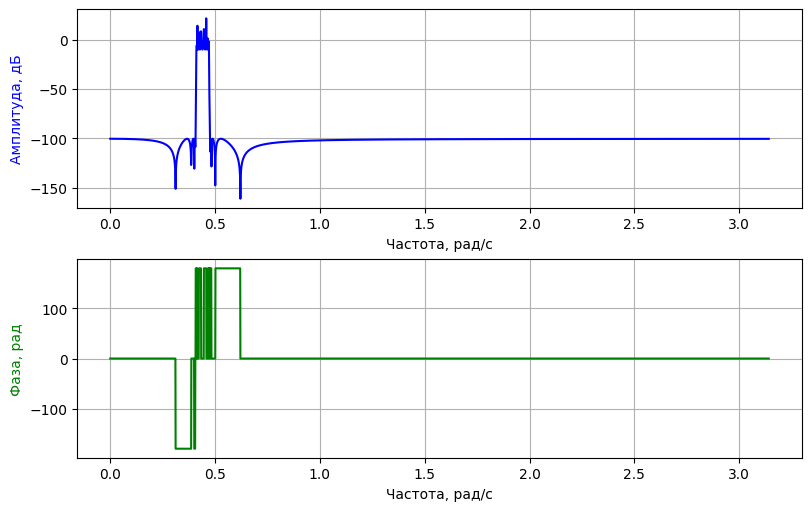

In [123]:
z3, p3, k3 = sp.lp2bp_zpk(z=z, p=p, k=k, wo=0.44, bw=0.06)
# w, mag, phase = sp.bode(system=(z3,p3,k3),n=100)
w, mag, phase = sp.bode(system=(z3,p3,k3),w=w0)
FRPRDiagram(w=w, fr=mag, pr=phase, logx=False)

In [124]:
b, a = sp.zpk2tf(z=z3, p=p3, k=k3)
print('Коэффициенты прямых связей:', b)
print('Коэффициенты обратных связей:', a)
# print('b =', *[format(x, ".4f") for x in b])
# print('a =', *[format(x, ".4f") for x in a])

Коэффициенты прямых связей: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Коэффициенты обратных связей: [1.     0.     1.9467 0.     1.7032 0.     0.882  0.     0.2994 0.     0.0696 0.     0.0112 0.     0.0012 0.     0.0001 0.     0.     0.     0.    ]


In [125]:
sos = sp.zpk2sos(z=z3, p=p3, k=k3, analog=True)
print('Секции второго порядка:', sos)
# print('sos =', *[format(x, ".4f") for x in sos])

Секции второго порядка: [[0.     0.     0.     1.     0.     0.2217]
 [1.     0.     0.3855 1.     0.     0.2203]
 [1.     0.     0.251  1.     0.     0.2167]
 [1.     0.     0.2332 1.     0.     0.2098]
 [1.     0.     0.2277 1.     0.     0.1995]
 [1.     0.     0.226  1.     0.     0.1879]
 [1.     0.     0.1493 1.     0.     0.1786]
 [1.     0.     0.1607 1.     0.     0.173 ]
 [1.     0.     0.1646 1.     0.     0.1702]
 [1.     0.     0.1659 1.     0.     0.1691]]


#### Синтез режекторного эллиптического фильтра по характеристикам прототипа

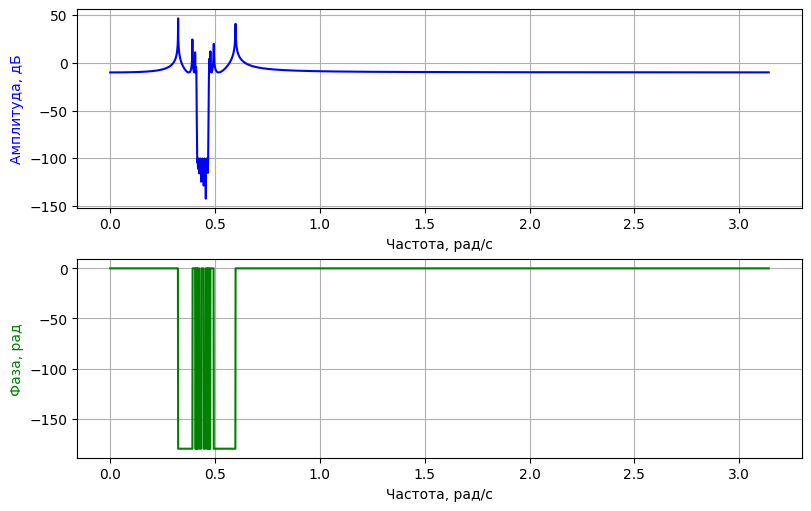

In [126]:
z4, p4, k4 = sp.lp2bs_zpk(z=z, p=p, k=k, wo=0.44, bw=0.06)
w, mag, phase = sp.bode(system=(z4,p4,k4),w=w0)
# w, mag, phase = sp.bode(system=(z4,p4,k4),n=100)
FRPRDiagram(w=w, fr=mag, pr=phase, logx=False)

In [127]:
b, a = sp.zpk2tf(z=z4, p=p4, k=k4)
print('Коэффициенты прямых связей:', b)
print('Коэффициенты обратных связей:', a)
# print('b =', *[format(x, ".4f") for x in b])
# print('a =', *[format(x, ".4f") for x in a])

Коэффициенты прямых связей: [0.3162 0.     0.6149 0.     0.5375 0.     0.2781 0.     0.0944 0.     0.0219 0.     0.0035 0.     0.0004 0.     0.     0.     0.     0.     0.    ]
Коэффициенты обратных связей: [1.     0.     2.0342 0.     1.8407 0.     0.9761 0.     0.336  0.     0.0785 0.     0.0126 0.     0.0014 0.     0.0001 0.     0.     0.     0.    ]


In [128]:
sos = sp.zpk2sos(z=z4, p=p4, k=k4, analog=True)
print('Секции второго порядка:', sos)
# print('sos =', *[format(x, ".4f") for x in sos])

Секции второго порядка: [[0.3162 0.     0.0629 1.     0.     0.3572]
 [1.     0.     0.2079 1.     0.     0.2437]
 [1.     0.     0.2139 1.     0.     0.2283]
 [1.     0.     0.217  1.     0.     0.2236]
 [1.     0.     0.2183 1.     0.     0.222 ]
 [1.     0.     0.1885 1.     0.     0.1688]
 [1.     0.     0.1803 1.     0.     0.1677]
 [1.     0.     0.1752 1.     0.     0.1642]
 [1.     0.     0.1727 1.     0.     0.1538]
 [1.     0.     0.1717 1.     0.     0.1049]]
